<a href="https://colab.research.google.com/github/benwalkerdata/Portfolio-R-NeuralNetwork/blob/main/Project_R_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Neural Net Project</h1>
A small project to test Neural Network using R.
I will be attempting to predict whether a bank note is authentic or not.

In [74]:
#Load the dataset
df <- read.csv('/content/bank_note_data.csv')

In [75]:
#Review columns of dataset
head(df)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.62160,8.6661,-2.8073,-0.44699,0
2,4.54590,8.1674,-2.4586,-1.46210,0
3,3.86600,-2.6383,1.9242,0.10645,0
4,3.45660,9.5228,-4.0112,-3.59440,0
5,0.32924,-4.4552,4.5718,-0.98880,0
6,4.36840,9.6718,-3.9606,-3.16250,0


The dataset consists of 5 columns.
<ul>
<li>Image.Var - variance of Wavelet transformed image (continuous)</li>
<li>Image.Skew - skewness of Wavelet transformed image (continuous)</li>
<li>Image.Curt - curtosis of Wavelet transformed image (continuous)</li>
<li>Entropy - entropy of image (continuous)</li>
<li>class - whether or not a bank note was authentic (integer)</li>
</ul>

In [76]:
#View the structure of the dataset
str(df)

'data.frame':	1372 obs. of  5 variables:
 $ Image.Var : num  3.622 4.546 3.866 3.457 0.329 ...
 $ Image.Skew: num  8.67 8.17 -2.64 9.52 -4.46 ...
 $ Image.Curt: num  -2.81 -2.46 1.92 -4.01 4.57 ...
 $ Entropy   : num  -0.447 -1.462 0.106 -3.594 -0.989 ...
 $ Class     : int  0 0 0 0 0 0 0 0 0 0 ...


In [77]:
#view a summary of the dataset
summary(df)

   Image.Var         Image.Skew        Image.Curt         Entropy       
 Min.   :-7.0421   Min.   :-13.773   Min.   :-5.2861   Min.   :-8.5482  
 1st Qu.:-1.7730   1st Qu.: -1.708   1st Qu.:-1.5750   1st Qu.:-2.4135  
 Median : 0.4962   Median :  2.320   Median : 0.6166   Median :-0.5867  
 Mean   : 0.4337   Mean   :  1.922   Mean   : 1.3976   Mean   :-1.1917  
 3rd Qu.: 2.8215   3rd Qu.:  6.815   3rd Qu.: 3.1793   3rd Qu.: 0.3948  
 Max.   : 6.8248   Max.   : 12.952   Max.   :17.9274   Max.   : 2.4495  
     Class       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.4446  
 3rd Qu.:1.0000  
 Max.   :1.0000  

<h2>Explore the data</h2>

In [78]:
#Install and load libraries
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("dplyr")) install.packages("dplyr")
if (!require("cowplot")) install.packages("cowplot")
library(cowplot)
library(ggplot2)
library(dplyr)

In [79]:
#Create a copy of the dataframe and convert the Class column to factor for visualisations
df1 <- df
df1$Class <- factor(df1$Class)

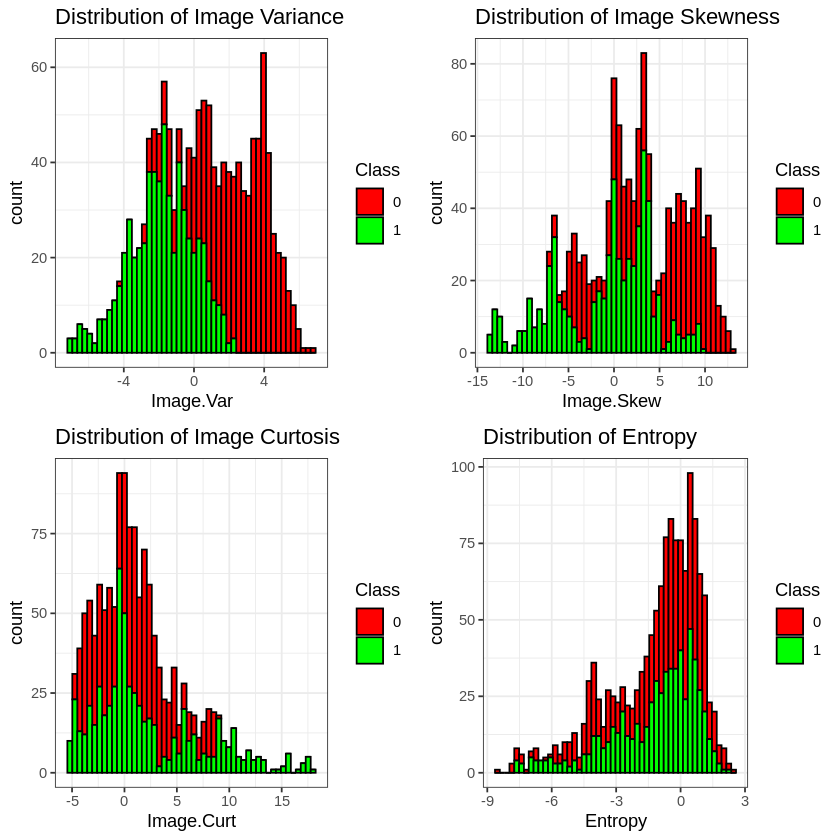

In [80]:
#Create visualisations
pl1 <- ggplot(df1,aes(x=Image.Var)) + geom_histogram(aes(fill=Class),color='black',bins=50) + scale_fill_manual(values=c('red','green')) + theme_bw() + ggtitle("Distribution of Image Variance")

pl2 <- ggplot(df1,aes(x=Image.Skew)) + geom_histogram(aes(fill=Class),color='black',bins=50) + scale_fill_manual(values=c('red','green')) + theme_bw() + ggtitle("Distribution of Image Skewness")

pl3 <- ggplot(df1,aes(x=Image.Curt)) + geom_histogram(aes(fill=Class),color='black',bins=50) + scale_fill_manual(values=c('red','green')) + theme_bw() + ggtitle("Distribution of Image Curtosis")

pl4 <- ggplot(df1,aes(x=Entropy)) + geom_histogram(aes(fill=Class),color='black',bins=50) + scale_fill_manual(values=c('red','green')) + theme_bw() + ggtitle("Distribution of Entropy")

combined_plot <- plot_grid(pl1,pl2,pl3,pl4, nrow = 2, ncol=2)
ggsave("combined_plot.png", plot = combined_plot, width = 16, height = 10, dpi = 300)
combined_plot

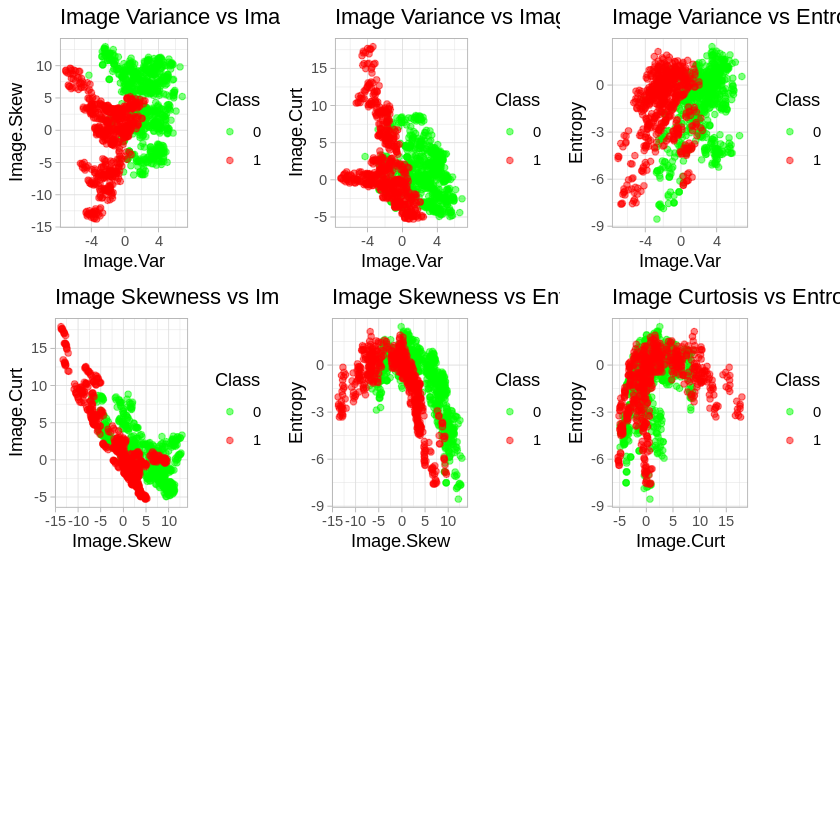

In [81]:
#Compare features
pl1 <- ggplot(df1,aes(x=Image.Var,y=Image.Skew)) + geom_point(aes(color=Class),alpha=0.5) + scale_color_manual(values = c("green", "red")) + theme_light() + ggtitle("Image Variance vs Image Skewness")
pl2 <- ggplot(df1,aes(x=Image.Var,y=Image.Curt)) + geom_point(aes(color=Class),alpha=0.5) + scale_color_manual(values = c("green", "red")) + theme_light() + ggtitle("Image Variance vs Image Curtosis")
pl3 <- ggplot(df1,aes(x=Image.Var,y=Entropy)) + geom_point(aes(color=Class),alpha=0.5) + scale_color_manual(values = c("green", "red")) + theme_light() + ggtitle("Image Variance vs Entropy")
pl4 <- ggplot(df1,aes(x=Image.Skew,y=Image.Curt)) + geom_point(aes(color=Class),alpha=0.5) + scale_color_manual(values = c("green", "red")) + theme_light() + ggtitle("Image Skewness vs Image Curtosis ")
pl5 <- ggplot(df1,aes(x=Image.Skew,y=Entropy)) + geom_point(aes(color=Class),alpha=0.5) + scale_color_manual(values = c("green", "red")) + theme_light() + ggtitle("Image Skewness vs Entropy ")
pl6 <- ggplot(df1,aes(x=Image.Curt,y=Entropy)) + geom_point(aes(color=Class),alpha=0.5) + scale_color_manual(values = c("green", "red")) + theme_light() + ggtitle("Image Curtosis vs Entropy ")

combined_plot <- plot_grid(pl1,pl2,pl3,pl4,pl5,pl6, nrow = 3, ncol=3)
ggsave("combined_plot1.png", plot = combined_plot, width = 16, height = 10, dpi = 300)
combined_plot

<h2>Train Test Split</h2>

In [82]:
#Split the data into test and train datasets
if (!require("caTools")) install.packages("caTools")
library(caTools)
set.seed(101)
split = sample.split(df$Class, SplitRatio = 0.70)

train = subset(df, split ==TRUE)
test = subset(df, split ==FALSE)

In [83]:
#Check the structure of the train dataset
str(train)

'data.frame':	960 obs. of  5 variables:
 $ Image.Var : num  3.622 4.546 3.457 0.329 4.368 ...
 $ Image.Skew: num  8.67 8.17 9.52 -4.46 9.67 ...
 $ Image.Curt: num  -2.81 -2.46 -4.01 4.57 -3.96 ...
 $ Entropy   : num  -0.447 -1.462 -3.594 -0.989 -3.163 ...
 $ Class     : int  0 0 0 0 0 0 0 0 0 0 ...


<h2>Building the Neural Net</h2>

In [85]:
#Load Neuralnet library
if (!require("neuralnet")) install.packages("neuralnet")
library(neuralnet)

In [86]:
#Train the Neuralnet
nn <- neuralnet(Class ~ Image.Var + Image.Skew + Image.Curt + Entropy,data=train,hidden=10,linear.output=FALSE)

<h2>Predictions</h2>

In [87]:
#Run the model against the test datast
predicted.nn.values <- compute(nn,test[,1:4])

NULL

In [88]:
#Check the head of the results
head(predicted.nn.values$net.result)

3,1.599481e-05
11,3.713852e-05
12,6.944038e-06
13,1.799146e-06
14,3.469965e-06
17,2.957117e-06


In [89]:
#Apply the round function so the class is either 0 or 1
predictions <- sapply(predicted.nn.values$net.result,round)

In [90]:
#Check the head of predictions
head(predictions)

[1] 0 0 0 0 0 0

In [91]:
#Display confusion matrix
table(predictions,test$Class)

           
predictions   0   1
          0 229   0
          1   0 183

The model worked very well. I'll compare is it to a Random Forest Model.

<h2>Comparing Models</h2>

In [92]:
#Load randomForest library
if (!require("randomForest")) install.packages("randomForest")
library(randomForest)

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [93]:
#As randomForest requires a factor, I'll create a new training and test set from df1 which I created earlier

set.seed(101)
split = sample.split(df1$Class, SplitRatio = 0.70)

train = subset(df1, split == TRUE)
test = subset(df1, split == FALSE)

In [94]:
#Train the randomForest model
model <- randomForest(Class ~ Image.Var + Image.Skew + Image.Curt + Entropy,data=train)

In [95]:
#Predict with the randomForest mode.
rf.pred <- predict(model,test)

In [96]:
##randomForest confusion matrix.
table(rf.pred,test$Class)

       
rf.pred   0   1
      0 227   1
      1   2 182

In [97]:
#Neural net prediction confusion matrix.
table(predictions,test$Class)

           
predictions   0   1
          0 229   0
          1   0 183

As you can see the Nerual network has a 100% prediction accuracy and beat the randomForest prediction.